# Problem 2: Calculation of the Average Energy in the Classical Limit

## Task 1: Average energy and heat capacity

#### Part a: Analysis of code structure

**Initialisation:**

N = 20000 # number of samples

deltax = 0.15 # max displacement nm

nm = 10^(-9) # nanometres

kf = 1.381*10^(-23) # Boltzmann const J m-2 K-1

T = 300.0 # temperature K

kT = k*T # initial thermal energy

kf = 10.0 # force const N m-1

V(x)-> kf*x^2*nm^2/2 # def function pot'l energy kg m2 s–2


Etot = 0.0 # initial energy <E>
    
E2tot = 0.0 # initial <E2>
    
x1 = 0.0 # first guess of x in nm
    
E1 = V(x1) # first guess of energy

    
**Monte Carlo Loop:**
    
    
    
for i from 1 to N do # start loop step (2)
    
    x2 = x1 + rand()*deltax # new x position
    
    E2 = V(x2) # new PE
    
    DeltaE = E2 - E1 # energy difference
    
    
**Data Caluclation:**
    
    
if DeltaE <= 0.0 then
               
    x1 = x2 # save new configuration
               
    E1 = E2 # save new energy
               
else if DeltaE > 0.0 then
    
    if exp(-DeltaE/kT) > rand() then
    
    x1 = x2 # save new configuration
    
    E1 = E2 # save new energy
    
    
**Analysis:** 
   
    
end if
    
    Etot = E1 # always add to total <E>
    
    E2tot = E2tot + E1^2 # add to total <E2>
    
end do # end loop step (3)
    
    
#average step
    
    
Eav = (Etot) # <E>
    
E2av = (E2tot/N) # <E2>
    
CV = (E2av-Eav^2)/(k*T^2)
    


#### Part b: Mistakes in the code

1. Boltzmann constant labelled as kf rather than k
2. Random number generated needs to be between -1 and 1 for harmonic oscillator
3. Total energy calculation at the end of the loop should be Etot = Etot + E1
4. Final energy calculation also needs to be divided by N to make it the average

#### Part c: Monte Carlo calculation of average energy, average energy squared and heat capacity

In [76]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate 

In [81]:
# Edited Monte Carlo Metropolis Algorithm code

N = 20000 # number of samples
deltax = 0.15 # max displacement nm
nm = 1e-9 # nanometres
k = 1.38065e-23 # Boltzmann const J m-2 K-1
T = 300.0 # temperature K
kT = k * T # initial thermal energy
kf = 10.0 # force const N m-1

def V(x):
    return ((kf * x ** 2) * nm ** 2) / 2

Etot = 0.0 # initial energy <E>
E2tot = 0.0 # initial <E2>
xtot = 0.0
x2tot = 0.0
x1 = 0.0 # first guess of x in nm
E1 = V(x1) # first guess of energy

for i in range(N): # start loop step (2)
    x2 = x1 + np.random.uniform(-1, 1) * deltax # new x position
    E2 = V(x2) # new PE
    DeltaE = E2 - E1 # energy difference
    
# next line is Metropolis sampling

    if DeltaE <= 0.0:
        x1 = x2 # save new configuration
        E1 = E2 # save new energy
        
    elif DeltaE > 0.0:
        if np.exp(-DeltaE/kT) > np.random.uniform():
            x1 = x2 # save new configuration
            E1 = E2 # save new energy
           
    Etot = Etot + E1 # always add to total <E>
    E2tot = E2tot + E1 ** 2 # add to total <E2>
    xtot = xtot + x1
    x2tot = x2tot + x1 ** 2

Eav = Etot/N # <E>
E2av = E2tot/N # <E2>
CV = (E2av - Eav ** 2) / (k * T ** 2)

print(f"Average energy: {Eav} J")
print(f"Average square energy: {E2av} J²")
print(f"Heat Capacity: {CV} J/K") # so small because the system is a single harmonic oscillator


Average energy: 2.071140676967763e-21 J
Average square energy: 1.2564998396380298e-41 J²
Heat Capacity: 6.659805721612457e-24 J/K


#### Part d: Verifying the theoretical value of the average potential energy

In [78]:
def numerator(x):
    return V(x) * np.exp((-1 * V(x)) / (k * T))

def denominator(x):
    return np.exp((-1 * V(x))/(k * T))

num_integral = integrate.quad(numerator, -np.inf, np.inf)[0]
denom_integral = integrate.quad(denominator, -np.inf, np.inf)[0]

energy = num_integral/denom_integral
print(f"The calculated value of the average potential energy is {energy} J which has good agreement with the theoretical value of 2.07e-21 J.")

The calculated value of the average potential energy is 2.091887579031346e-21 J which has good agreement with the theoretical value of 2.07e-21 J.


## Task 2: Average displacement calculations

In [79]:
# Calculation of <x> and <x²> 
x = xtot / N
x2 = x2tot / N

print(f"<x>: {x} nm")
print(f"<x²>: {x2} nm²")

<x>: 0.0003678773235656771 nm
<x²>: 0.00042003373354844724 nm²


#### Expected results for average dispacement

The average displacement is expected to be very near to zero in a harmonic oscillator as it is moving in both positive and negative directions, averaging to around zero.

#### Average square displacement

There is very good agreement between the calculated x² and the theoretical x² of 0.00041 nm², showing the accuracy of this numerical method.


## Task 3: Understanding

The Metropolis Monte Carlo method is an example of importance sampling, meaning that more probable outcomes contribute to a greater degree. In this example, this is controlled by the constraints placed on the difference in energy, where if a newly calculated value is smaller than the original value, this is accepted as 'important'. If the new value is greater, it is weighted according to the boltzmann distribution, with decreasing importance.

## Task 4: Error calculations

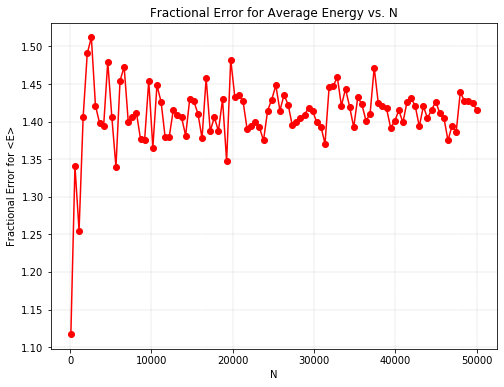

In [80]:
# Calculating the fractional error for the average energy for different values of N

def fractional_energy_error(N):

    Etot = 0.0
    E2tot = 0.0
    x1 = 0.0
    E1 = V(x1)

    for i in range(N):
        x2 = x1 + np.random.uniform(-1, 1) * deltax
        E2 = V(x2)
        DeltaE = E2 - E1

    # Metropolis sampling

        if DeltaE <= 0.0:
            x1 = x2
            E1 = E2 

        elif DeltaE > 0.0:
            if np.exp(-DeltaE/kT) > np.random.uniform():
                x1 = x2
                E1 = E2 

        Etot = Etot + E1 
        E2tot = E2tot + E1 ** 2 

    Eav = Etot/N if N > 0 else np.nan # To avoid dividing by 0
    E2av = E2tot/N if N > 0 else np.nan # To avoid math error
    CV = (E2av - Eav ** 2) / (k * T ** 2) if Eav != np.nan else np.nan # To avoid diving by 0
    
    if CV < 0:
        return np.nan # To avoid potential negative heat capacities causing issues in the square root 
    
    return (np.sqrt(CV * k * T ** 2)) / Eav if Eav != 0 else np.nan 

# Defining axis
N_values = np.linspace(100, 50000, num=100, dtype=int) 
errors = [fractional_energy_error(N) for N in N_values]

# Producing a line plot of periodic N values to show the fractional error variance
plt.figure(figsize=(8, 6))
plt.plot(N_values, errors, marker='o', linestyle='-', color='r')
plt.xlabel("N")
plt.ylabel("Fractional Error for <E>")
plt.title("Fractional Error for Average Energy vs. N")
plt.grid(True, which="both", linestyle="--", linewidth=0.3)
plt.show()


## Task 6: Bonus Point

I deserve a bonus point because my graph is well presented, with good titles for the axis, and clearly shows that the higher the number of samples, the smaller the variation in fractional error of the avergae energy, meaning the more samples taken, the more reliable and consistent the result will be, with an error approaching a constant fractional value. Also, I have effectively mitigated the RunTime Warning by including some additional checks that ensure only reasonable and practically sensible results are obtained.

## Self Assessment

### Task 1

1a - 0.4 marks

I think my division makes sense, but could understand arguements for it being split in slightly different ways

1b - 0.5 marks

I think I have correctly identified the 4 mistakes

1c - 2 marks

My Monte Carlo Algorithm works and produces accurate reuslts, indicated by the average energy calculation which is within reasonable range of the theoretical value given

1d - 1 mark

My integration calculation has very good agreement with the theoretical value

### Task 2

1a - 0.45 marks

I think my answer and explanation are generally correct, but my explanation could be slightly more detailed and in depth

1b - 0.5 marks

My answer is nearly an exact match for the theoretical value

### Task 3

0.8 marks

I think my answer covers the main theory behind the metropolis monte carlo method, but could be more direct and comprehensive

### Task 4

1 mark

I defined a function for the error that reduces the potential math errors created by ranging over small values of N, as well as producing a nice, well presneted plot

### Task 5

2 marks

I think my notebook is well presented and considered to make it easy to read through, making sure I was always explaining what the code is doing

### Task 6

1 mark

I deserve a bonus point for the math error checks in my error function



## Declaration of Academic Integrity

This is all my own work and I have given it marks based on what I think is fair.